# BRAIN Project - Data Analysis Notebook (IEEE Publication Quality)

Ce notebook montre comment utiliser le module `data_analysis` pour analyser les résultats des batchs et générer des **figures vectorielles PDF** compatibles avec **LaTeX/Overleaf** et les standards **IEEE**.

## Caractéristiques
- **Sortie PDF vectorielle** pour qualité publication
- **Tailles IEEE standardisées** (single column: 3.5in, double column: 7.16in)
- **Palette colorblind-friendly** (Wong palette)
- **Fonts Computer Modern** (compatibles LaTeX)

## Table des matières
1. [Setup IEEE](#1-setup-ieee)
2. [Chargement des données](#2-chargement-des-données)
3. [Exploration des données](#3-exploration-des-données)
4. [Métriques statistiques](#4-métriques-statistiques)
5. [Visualisations IEEE](#5-visualisations-ieee)
6. [Export pour publication IEEE](#6-export-pour-publication-ieee)
7. [Analyses avancées](#7-analyses-avancées-bonus)

## 1. Setup IEEE

In [1]:
# Imports
import sys
import shutil
from pathlib import Path

# Ajouter le répertoire parent au path
sys.path.insert(0, str(Path.cwd().parent))

# Imports du module data_analysis
from data_analysis import DataLoader, MetricsCalculator, AnalysisVisualizer, ReportGenerator

# Autres imports utiles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =============================================================================
# CONFIGURATION IEEE PUBLICATION QUALITY
# =============================================================================

# Vérifier si LaTeX est disponible
LATEX_AVAILABLE = shutil.which('latex') is not None
print(f"LaTeX disponible: {'Oui' if LATEX_AVAILABLE else 'Non (fallback fonts)'}")

# Configuration matplotlib pour qualité publication IEEE
plt.rcParams.update({
    # LaTeX rendering (uniquement si disponible)
    "text.usetex": LATEX_AVAILABLE,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"] if LATEX_AVAILABLE else ["DejaVu Serif"],
    
    # Tailles de police IEEE
    "font.size": 10,
    "axes.labelsize": 10,
    "axes.titlesize": 11,
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    
    # Figure settings
    "figure.figsize": (7.16, 3.5),  # IEEE double column
    "figure.dpi": 150,
    "savefig.dpi": 300,
    "savefig.bbox": "tight",
    "savefig.format": "pdf",  # VECTORIEL par défaut
    
    # Style
    "axes.grid": False,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "lines.linewidth": 1.5,
})

# Tailles IEEE pour référence
IEEE_SINGLE_COLUMN = (3.5, 2.5)   # 3.5 inches width
IEEE_DOUBLE_COLUMN = (7.16, 3.5)  # 7.16 inches width

# Dossier de sortie pour les figures
OUTPUT_DIR = Path("../analysis/figures_ieee/")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

%matplotlib inline

print(f"\n✓ Setup IEEE complete!")
print(f"📁 Figures will be saved to: {OUTPUT_DIR.absolute()}")

LaTeX disponible: Non (fallback fonts)

✓ Setup IEEE complete!
📁 Figures will be saved to: /Users/patriciadauphole/Desktop/2A - SUPAERO/UE7 - Projets/Projet BRAIN/Projet-BRAIN/Arthur_2/BRAIN_PROJECT/notebooks/../analysis/figures_ieee


## 2. Chargement des données

In [2]:
# Créer un DataLoader
loader = DataLoader()

# Configuration: choisir le mode de chargement
results_dir = "../results/"

# OPTION 1: Charger UNIQUEMENT le dernier batch (RECOMMANDÉ)
df = loader.load_latest_batch(results_dir)

# OPTION 2: Charger TOUS les batchs (décommenter pour historique)
# df = loader.load_all_batches(results_dir)

print(f"\n📊 Loaded {len(df)} task results")

Found 13 batch folders
📌 Loading LATEST batch only: batch_20260204_103322
✓ Loaded 140 task results from batch_20260204_103322

📊 Loaded 140 task results


In [3]:
# Autres options de chargement:
#
# Charger un batch spécifique par son nom:
# df = loader.load_batch("../results/batch_20260202_101145/")
#
# Charger depuis un CSV exporté:
# df = loader.load_csv("../analysis/full_data.csv")
#
# Charger tous les batchs pour comparer l'historique:
# df = loader.load_all_batches(results_dir)

## 3. Exploration des données

In [4]:
# Aperçu du DataFrame
print("Colonnes disponibles:")
print(df.columns.tolist())

Colonnes disponibles:
['task_id', 'task_file', 'success', 'is_correct', 'accuracy', 'execution_time', 'detected_transformations', 'action_used', 'error_message', 'num_train_examples', 'num_test_examples', 'grid_size', 'primary_transformation', 'transformation_confidence', 'transformation_params', 'was_fallback_used', 'llm_proposed_action', 'fallback_reason', 'batch_id', 'model', 'batch_timestamp', 'program_version', 'timing_total', 'timing_llm_response', 'timing_detection', 'timing_action_execution', 'complexity_mode', 'complexity_num_colors', 'complexity_num_objects']


In [5]:
# Premières lignes
df.head()

,task_id,task_file,success,is_correct,accuracy,execution_time,detected_transformations,action_used,error_message,num_train_examples,...,model,batch_timestamp,program_version,timing_total,timing_llm_response,timing_detection,timing_action_execution,complexity_mode,complexity_num_colors,complexity_num_objects
0,task_add_border_01,data/task_add_border_01.json,True,True,1.00,8.714537,"[add_border, add_border]",scale,None,2,...,gemma2,2026-02-04T10:33:22.765903,1.11.0,8.715,8.492,0.000,0.001,single,1,0
1,task_add_border_02,data/task_add_border_02.json,True,True,1.00,7.776131,"[add_border, add_border]",scale,None,2,...,gemma2,2026-02-04T10:33:22.765903,1.11.0,7.776,7.761,0.000,0.003,single,1,0
2,task_add_border_03,data/task_add_border_03.json,True,True,1.00,8.112852,"[add_border, add_border]",color_change,None,2,...,gemma2,2026-02-04T10:33:22.765903,1.11.0,8.113,8.102,0.000,0.000,single,1,0
3,task_add_border_04,data/task_add_border_04.json,True,True,1.00,9.653973,"[add_border, add_border, add_border]",scale,None,3,...,gemma2,2026-02-04T10:33:22.765903,1.11.0,9.654,9.641,0.001,0.001,single,1,0
4,task_add_border_05,data/task_add_border_05.json,True,False,0.84,6.874355,[rotation],reflect,None,1,...,gemma2,2026-02-04T10:33:22.765903,1.11.0,6.874,6.866,0.000,0.000,single,1,0


In [6]:
# Statistiques de base
df.describe()

,accuracy,execution_time,num_train_examples,num_test_examples,transformation_confidence,timing_total,timing_llm_response,timing_detection,timing_action_execution,complexity_num_colors,complexity_num_objects
count,140.000000,140.000000,140.000000,140.0,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.0
mean,0.978351,7.797010,1.457143,1.0,0.942143,7.797029,7.293564,0.000529,0.001029,1.207143,0.0
std,0.094439,1.849807,0.527945,0.0,0.218585,1.849821,2.237434,0.001115,0.003933,0.817932,0.0
min,0.000000,4.561525,1.000000,1.0,0.000000,4.562000,0.000000,0.000000,0.000000,1.000000,0.0
25%,1.000000,6.641188,1.000000,1.0,1.000000,6.641000,6.575500,0.000000,0.000000,1.000000,0.0
50%,1.000000,7.367276,1.000000,1.0,1.000000,7.367500,7.176500,0.000000,0.001000,1.000000,0.0
75%,1.000000,8.255082,2.000000,1.0,1.000000,8.254750,8.102500,0.001000,0.001000,1.000000,0.0
max,1.000000,14.340804,3.000000,1.0,1.000000,14.341000,14.321000,0.011000,0.045000,9.000000,0.0


In [7]:
# Distribution des transformations
if 'primary_transformation' in df.columns:
    print("Distribution des transformations:")
    print(df['primary_transformation'].value_counts())

Distribution des transformations:
primary_transformation
tiling          20
translation     18
rotation        16
reflection      16
composite       14
scaling         11
draw_line       10
flood_fill      10
symmetry        10
add_border       4
color_change     4
Name: count, dtype: int64


In [8]:
# Distribution des modèles (si plusieurs)
if 'model' in df.columns:
    print("Modèles utilisés:")
    print(df['model'].value_counts())

Modèles utilisés:
model
gemma2    140
Name: count, dtype: int64


In [9]:
# Taux de succès global
print(f"Accuracy moyenne: {df['accuracy'].mean():.1%}")
print(f"Taux de succès (100%): {df['is_correct'].mean():.1%}")
print(f"Taux d'échec: {(~df['success']).mean():.1%}")

Accuracy moyenne: 97.8%
Taux de succès (100%): 83.6%
Taux d'échec: 0.0%


## 4. Métriques statistiques

In [10]:
# Créer un calculateur de métriques
calc = MetricsCalculator(df)

In [11]:
# Accuracy globale
overall = calc.overall_accuracy()
print("📊 Accuracy globale:")
for key, value in overall.items():
    if isinstance(value, float):
        print(f"  {key}: {value:.4f}")
    else:
        print(f"  {key}: {value}")

📊 Accuracy globale:
  mean: 0.9784
  std: 0.0944
  min: 0.0000
  max: 1.0000
  median: 1.0000
  count: 140


In [12]:
# Accuracy par type de transformation
acc_by_trans = calc.accuracy_by_transformation()
print("📊 Accuracy par transformation:")
acc_by_trans

📊 Accuracy par transformation:


,mean,std,count,min,max,success_rate
primary_transformation,,,,,,
add_border,1.0000,0.0000,4,1.0000,1.0,1.0000
draw_line,1.0000,0.0000,10,1.0000,1.0,1.0000
flood_fill,1.0000,0.0000,10,1.0000,1.0,1.0000
tiling,1.0000,0.0000,20,1.0000,1.0,1.0000
scaling,0.9973,0.0090,11,0.9700,1.0,0.9091
symmetry,0.9930,0.0189,10,0.9400,1.0,0.8000
translation,0.9922,0.0170,18,0.9400,1.0,0.7778
color_change,0.9850,0.0300,4,0.9400,1.0,0.7500
composite,0.9782,0.0398,14,0.8750,1.0,0.7143


In [13]:
# Accuracy par modèle (si plusieurs modèles)
acc_by_model = calc.accuracy_by_model()
if not acc_by_model.empty:
    print("📊 Accuracy par modèle:")
    display(acc_by_model)

📊 Accuracy par modèle:


,mean,std,count,min,max,success_rate
model,,,,,,
gemma2,0.9784,0.0944,140,0.0,1.0,0.8357


In [14]:
# Comparaison LLM vs Fallback
llm_fb = calc.llm_vs_fallback_comparison()
print("🤖 LLM vs Fallback:")
for key, value in llm_fb.items():
    if isinstance(value, dict):
        print(f"  {key}:")
        for k, v in value.items():
            print(f"    {k}: {v:.4f}" if isinstance(v, float) else f"    {k}: {v}")
    else:
        print(f"  {key}: {value:.4f}" if isinstance(value, float) else f"  {key}: {value}")

🤖 LLM vs Fallback:
  llm_only:
    count: 54
    accuracy_mean: 0.9793
    accuracy_std: 0.1363
    success_rate: 0.9444
  with_fallback:
    count: 86
    accuracy_mean: 0.9778
    accuracy_std: 0.0548
    success_rate: 0.7674
  fallback_usage_rate: 0.6143


In [15]:
# Statistiques de timing
timing = calc.timing_statistics()
print("⏱️ Timing (secondes):")
for component, stats in timing.items():
    print(f"  {component}: mean={stats['mean']:.3f}s, std={stats['std']:.3f}s")

⏱️ Timing (secondes):
  total: mean=7.797s, std=1.850s
  llm: mean=7.294s, std=2.237s
  detection: mean=0.001s, std=0.001s
  execution: mean=0.001s, std=0.004s
  total_legacy: mean=7.797s, std=1.850s


In [16]:
# T-test entre deux groupes (exemple: deux transformations)
# Décommenter et modifier selon vos données

# transformations = df['primary_transformation'].unique()
# if len(transformations) >= 2:
#     t1, t2 = transformations[0], transformations[1]
#     ttest = calc.compare_models_ttest(t1, t2, metric='accuracy')
#     print(f"T-test {t1} vs {t2}:")
#     print(f"  p-value: {ttest['p_value']:.4f}")
#     print(f"  Significatif (α=0.05): {ttest['significant_005']}")

## 5. Visualisations IEEE

Les visualisations suivantes utilisent:
- **Tailles IEEE standardisées** (single: 3.5in, double: 7.16in)
- **PDF vectoriel** pour qualité publication
- **Palette colorblind-friendly** (Wong palette)

In [17]:
# Créer le visualiseur en mode publication IEEE
viz = AnalysisVisualizer(df, style="publication")

# Info sur la configuration
print(f"LaTeX disponible: {viz.latex_available}")
print(f"Style: {viz.style}")
print(f"\nTailles IEEE disponibles:")
print(f"  Single column: {viz.IEEE_SINGLE_COLUMN}")
print(f"  Double column: {viz.IEEE_DOUBLE_COLUMN}")

LaTeX disponible: False
Style: publication

Tailles IEEE disponibles:
  Single column: (3.5, 2.5)
  Double column: (7.16, 3.5)


### 5.1 Accuracy par transformation (IEEE double column)

In [18]:
# Barplot avec taille IEEE double column et export PDF
fig = viz.plot_accuracy_by_transformation(
    ieee_size="double",  # 7.16 inches width
    show_std=True,
    show_n=True,
    save_path=str(OUTPUT_DIR / "accuracy_by_transformation"),
    save_formats=["pdf", "png"]  # PDF vectoriel + PNG preview
)

Saved: ../analysis/figures_ieee/accuracy_by_transformation.pdf
Saved: ../analysis/figures_ieee/accuracy_by_transformation.png


### 5.2 Boxplot de la distribution (IEEE double column)

In [19]:
# Boxplot avec taille IEEE
fig = viz.plot_accuracy_boxplot(
    ieee_size="double",
    save_path=str(OUTPUT_DIR / "accuracy_boxplot"),
    save_formats=["pdf", "png"]
)

Saved: ../analysis/figures_ieee/accuracy_boxplot.pdf
Saved: ../analysis/figures_ieee/accuracy_boxplot.png


### 5.3 Comparaison des modèles

In [20]:
# Comparaison des modèles (si plusieurs modèles)
if df['model'].nunique() > 1:
    fig = viz.plot_model_comparison(figsize=(10, 6))
    plt.show()
else:
    print("Un seul modèle dans les données - comparaison non disponible")

Un seul modèle dans les données - comparaison non disponible


### 5.4 LLM vs Fallback (IEEE double column)

In [21]:
# Comparaison LLM vs Fallback
fig = viz.plot_llm_vs_fallback(
    ieee_size="double",
    save_path=str(OUTPUT_DIR / "llm_vs_fallback"),
    save_formats=["pdf", "png"]
)

Saved: ../analysis/figures_ieee/llm_vs_fallback.pdf
Saved: ../analysis/figures_ieee/llm_vs_fallback.png


### 5.5 Décomposition du timing (IEEE double column)

In [22]:
# Breakdown du temps par composante
fig = viz.plot_timing_breakdown(
    ieee_size="double",
    save_path=str(OUTPUT_DIR / "timing_breakdown"),
    save_formats=["pdf", "png"]
)

Saved: ../analysis/figures_ieee/timing_breakdown.pdf
Saved: ../analysis/figures_ieee/timing_breakdown.png


### 5.6 Matrice de confusion (IEEE single column)

In [23]:
# Matrice de confusion (format carré, single column)
fig = viz.plot_confusion_matrix(
    ieee_size="single",
    save_path=str(OUTPUT_DIR / "confusion_matrix"),
    save_formats=["pdf", "png"]
)

Saved: ../analysis/figures_ieee/confusion_matrix.pdf
Saved: ../analysis/figures_ieee/confusion_matrix.png


### 5.7 Visualisations personnalisées

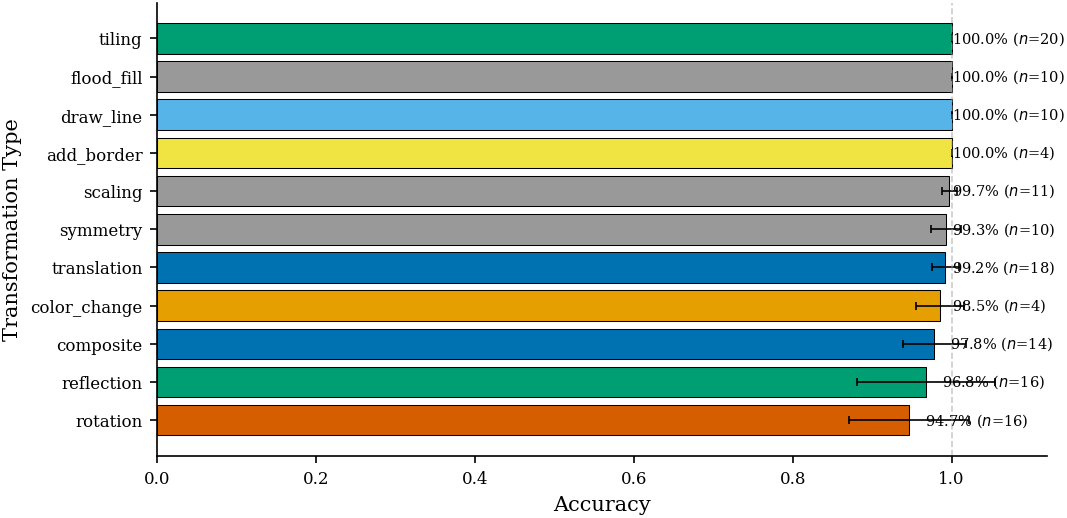

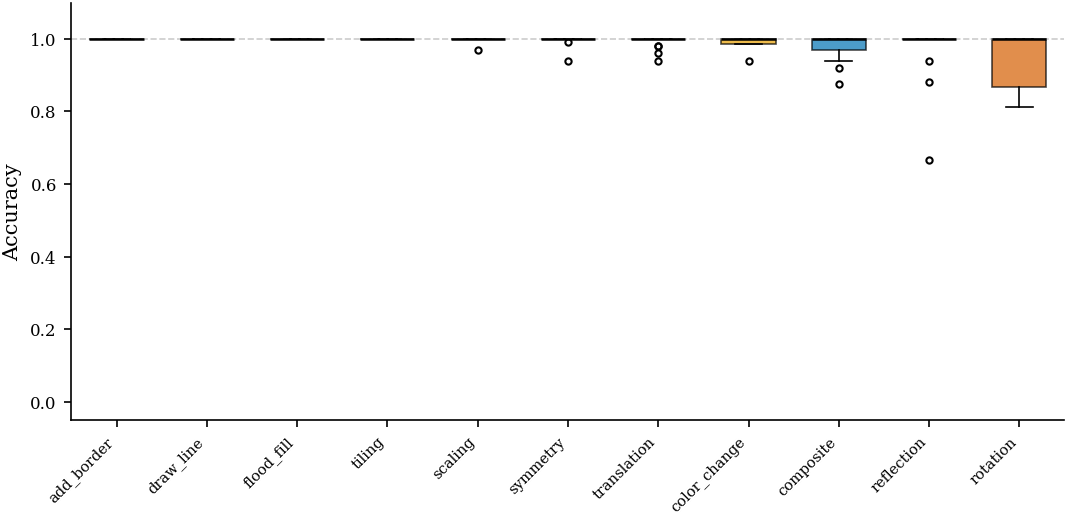

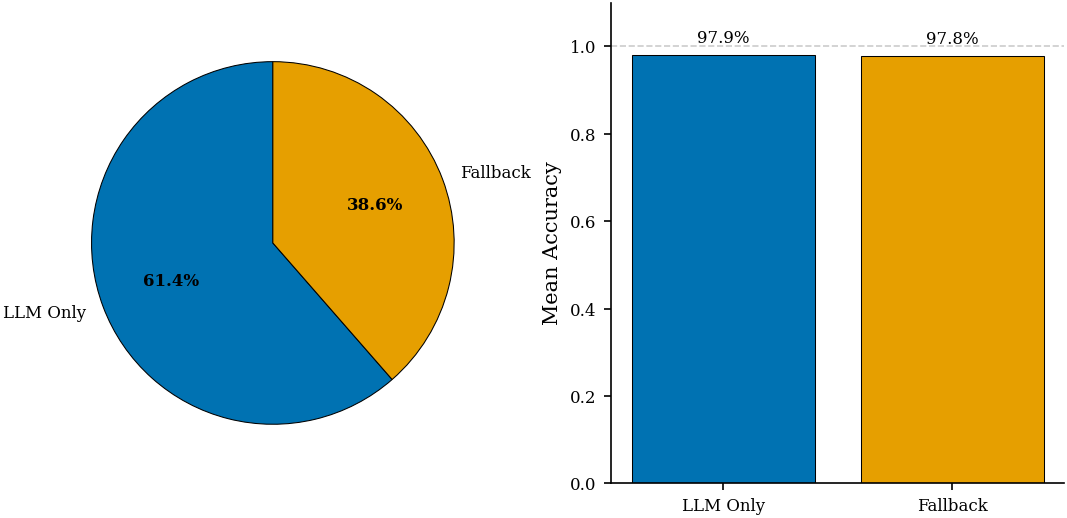

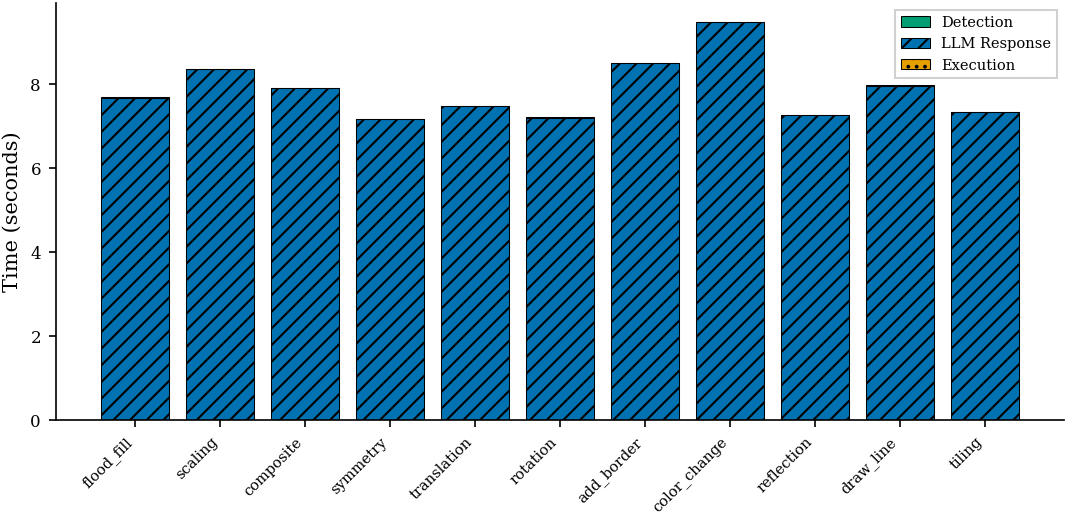

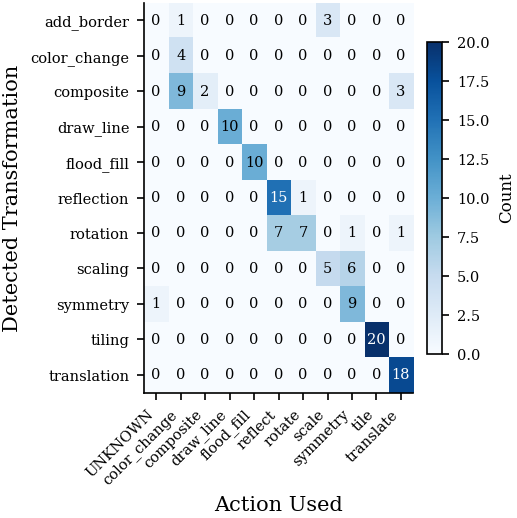

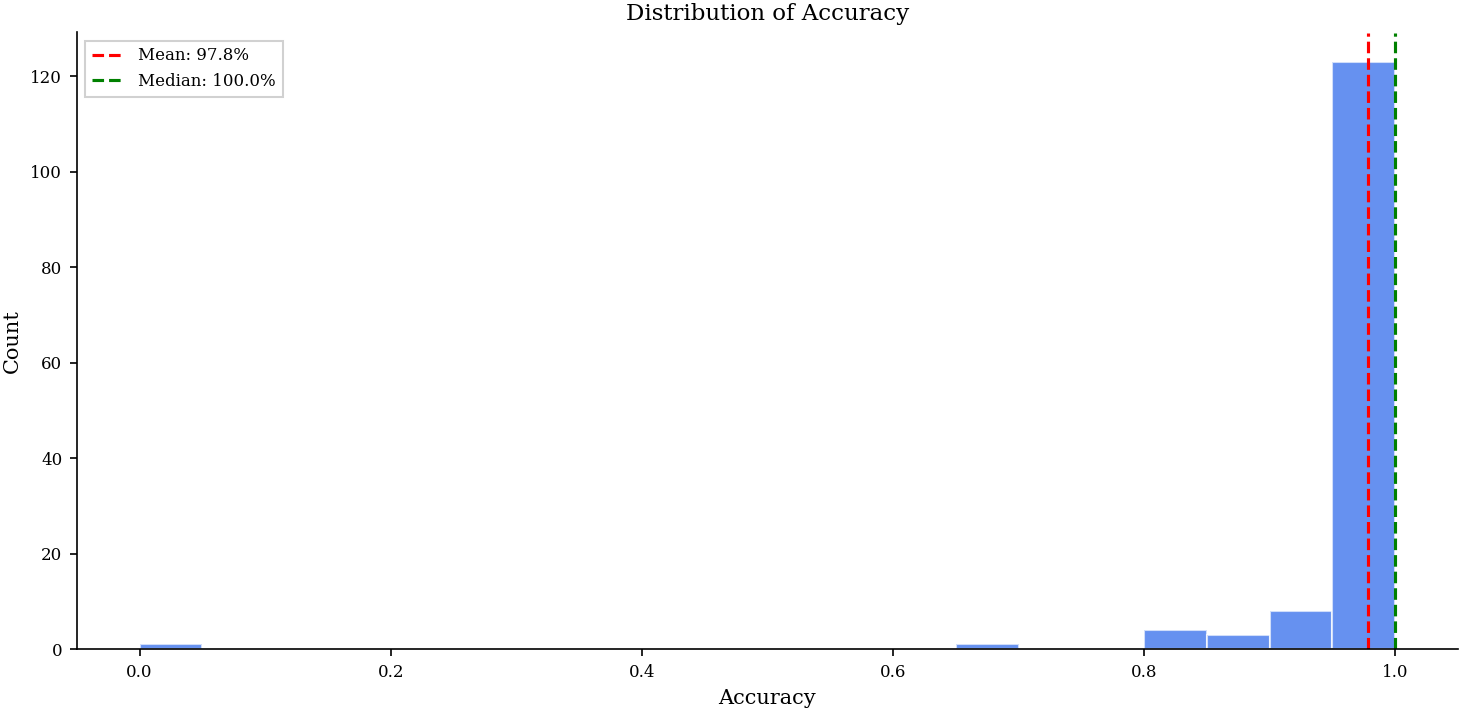

In [24]:
# Exemple: histogramme de l'accuracy
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(df['accuracy'], bins=20, edgecolor='white', alpha=0.7, color='#2563eb')
ax.axvline(df['accuracy'].mean(), color='red', linestyle='--', label=f'Mean: {df["accuracy"].mean():.1%}')
ax.axvline(df['accuracy'].median(), color='green', linestyle='--', label=f'Median: {df["accuracy"].median():.1%}')

ax.set_xlabel('Accuracy')
ax.set_ylabel('Count')
ax.set_title('Distribution of Accuracy')
ax.legend()

plt.tight_layout()
plt.show()

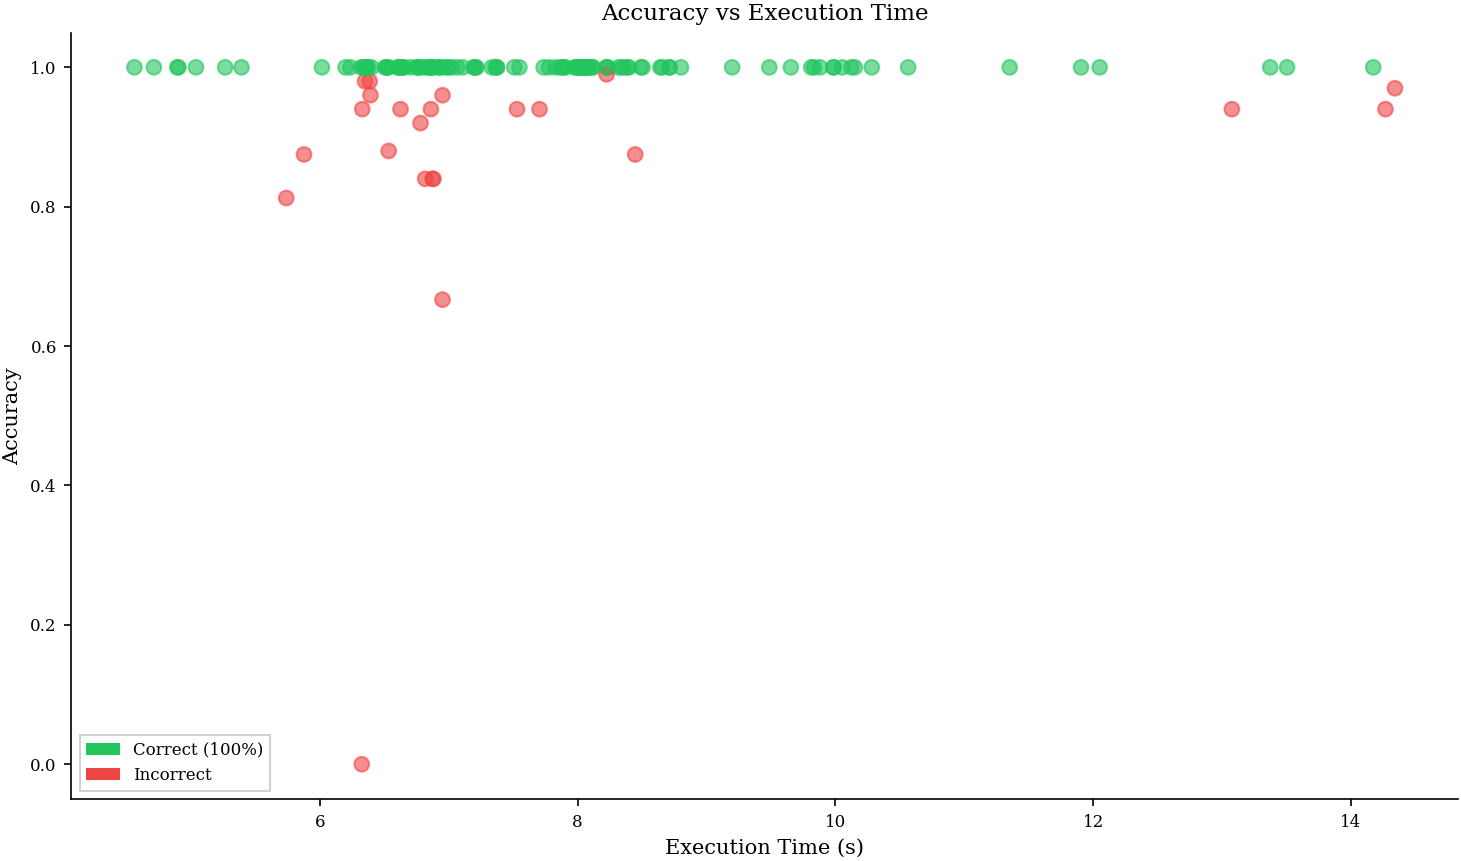

In [25]:
# Exemple: scatter plot accuracy vs temps d'exécution
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(
    df['execution_time'], 
    df['accuracy'],
    c=df['is_correct'].map({True: '#22c55e', False: '#ef4444'}),
    alpha=0.6,
    s=50
)

ax.set_xlabel('Execution Time (s)')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs Execution Time')

# Légende
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#22c55e', label='Correct (100%)'),
    Patch(facecolor='#ef4444', label='Incorrect')
]
ax.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

## 6. Export pour publication IEEE

Cette section génère tous les fichiers nécessaires pour une publication IEEE:
- **Figures PDF** vectorielles
- **Tableaux LaTeX** prêts à inclure
- **CSV** pour données supplémentaires

In [26]:
# Créer un générateur de rapports
gen = ReportGenerator(df, calc)

In [27]:
# Générer des tableaux LaTeX
output_dir = "../analysis/"
gen.generate_latex_tables(output_dir + "latex/")

Generated: ../analysis/latex/brain_accuracy_transformation.tex
Generated: ../analysis/latex/brain_llm_fallback.tex
Generated: ../analysis/latex/brain_timing.tex


In [28]:
# Générer un rapport Markdown
gen.generate_markdown_report(output_dir + "report.md")

Generated: ../analysis/report.md


In [29]:
# Exporter en CSV
gen.generate_csv_summary(output_dir + "summary.csv")
gen.export_full_data(output_dir + "full_data.csv")

Generated: ../analysis/summary.csv
Exported: ../analysis/full_data.csv


In [30]:
# Générer toutes les figures IEEE d'un coup
ieee_figures_dir = str(OUTPUT_DIR)

viz.generate_all_plots(
    output_dir=ieee_figures_dir,
    formats=["pdf"]  # PDF vectoriel pour IEEE
)

print(f"\n✓ All IEEE figures saved to: {ieee_figures_dir}")

Generating publication-quality figures...
Saved: ../analysis/figures_ieee/accuracy_by_transformation.pdf
Saved: ../analysis/figures_ieee/accuracy_boxplot.pdf
Saved: ../analysis/figures_ieee/timing_breakdown.pdf
Saved: ../analysis/figures_ieee/llm_vs_fallback.pdf
Saved: ../analysis/figures_ieee/confusion_matrix.pdf
Saved: ../analysis/figures_ieee/model_comparison.pdf
No variance in complexity_num_objects - cannot plot trend

All figures saved to: ../analysis/figures_ieee

✓ All IEEE figures saved to: ../analysis/figures_ieee


In [31]:
# Liste des fichiers générés
from pathlib import Path

print("Fichiers PDF générés pour IEEE:")
for f in sorted(OUTPUT_DIR.glob("*.pdf")):
    print(f"  - {f.name}")

print(f"\n💡 Ces fichiers PDF peuvent être directement inclus dans LaTeX:")
print(r'   \includegraphics[width=\columnwidth]{figures/accuracy_by_transformation.pdf}')

Fichiers PDF générés pour IEEE:
  - accuracy_boxplot.pdf
  - accuracy_by_transformation.pdf
  - confusion_matrix.pdf
  - llm_vs_fallback.pdf
  - model_comparison.pdf
  - timing_breakdown.pdf

💡 Ces fichiers PDF peuvent être directement inclus dans LaTeX:
   \includegraphics[width=\columnwidth]{figures/accuracy_by_transformation.pdf}


### Inclusion dans LaTeX/Overleaf

Pour inclure les figures dans un document IEEE LaTeX:

```latex
% Single column figure
\begin{figure}[t]
    \centering
    \includegraphics[width=\columnwidth]{figures/confusion_matrix.pdf}
    \caption{Confusion matrix: detected transformation vs executed action.}
    \label{fig:confusion}
\end{figure}

% Double column figure (spanning both columns)
\begin{figure*}[t]
    \centering
    \includegraphics[width=\textwidth]{figures/accuracy_by_transformation.pdf}
    \caption{Accuracy by transformation type across all tasks.}
    \label{fig:accuracy}
\end{figure*}
```

Pour inclure les tableaux LaTeX:

```latex
\input{latex/brain_accuracy_transformation.tex}
\input{latex/brain_llm_fallback.tex}
\input{latex/brain_timing.tex}
```

## 7. Analyses avancées (bonus)

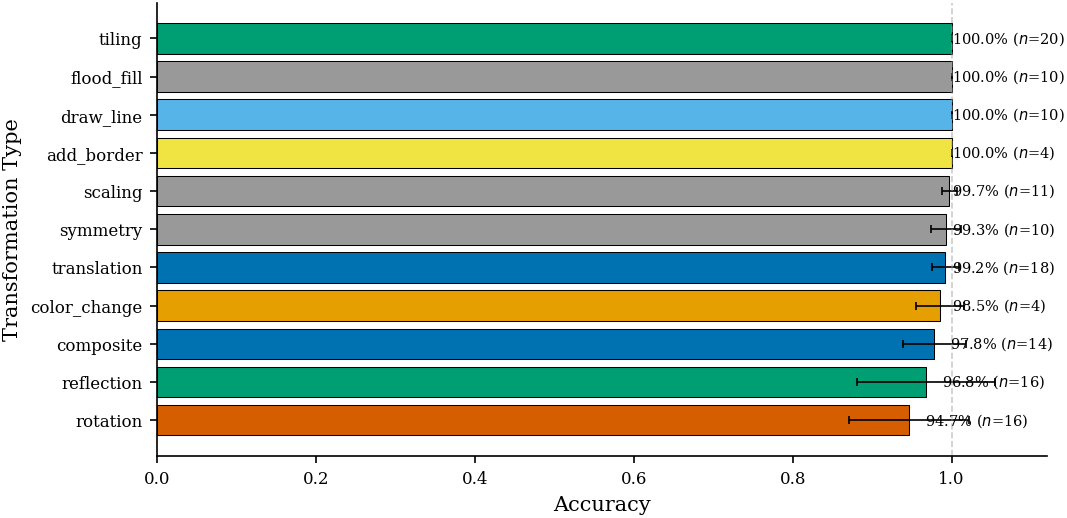

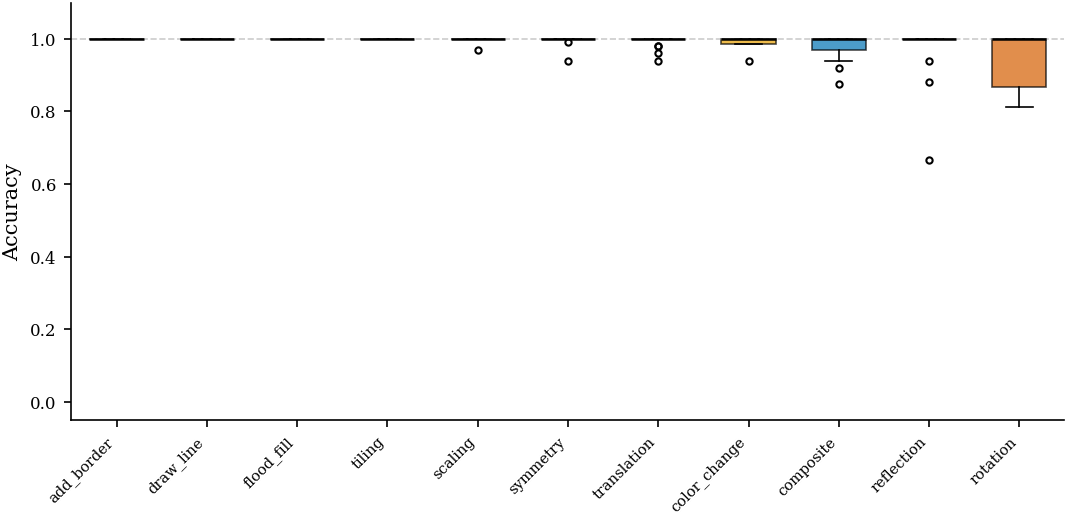

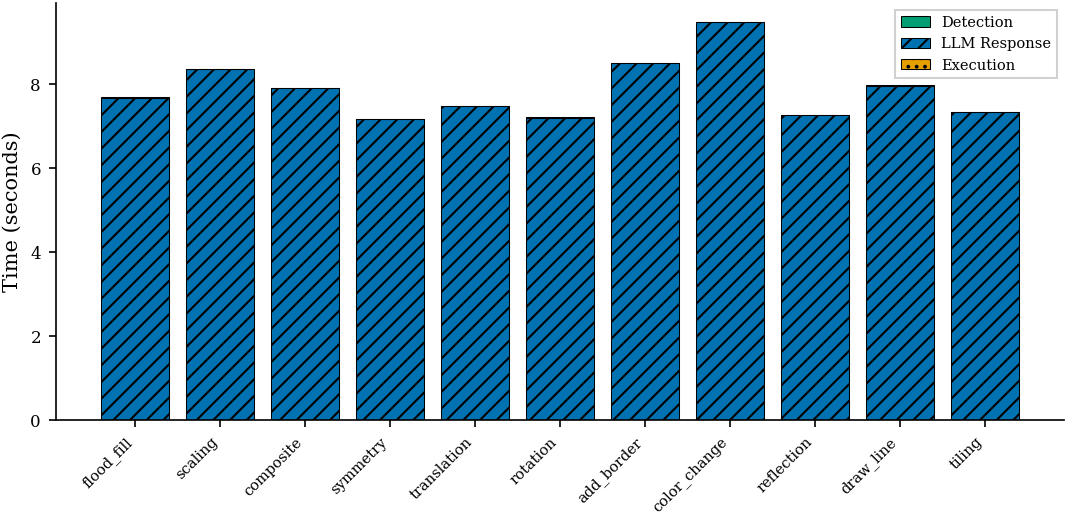

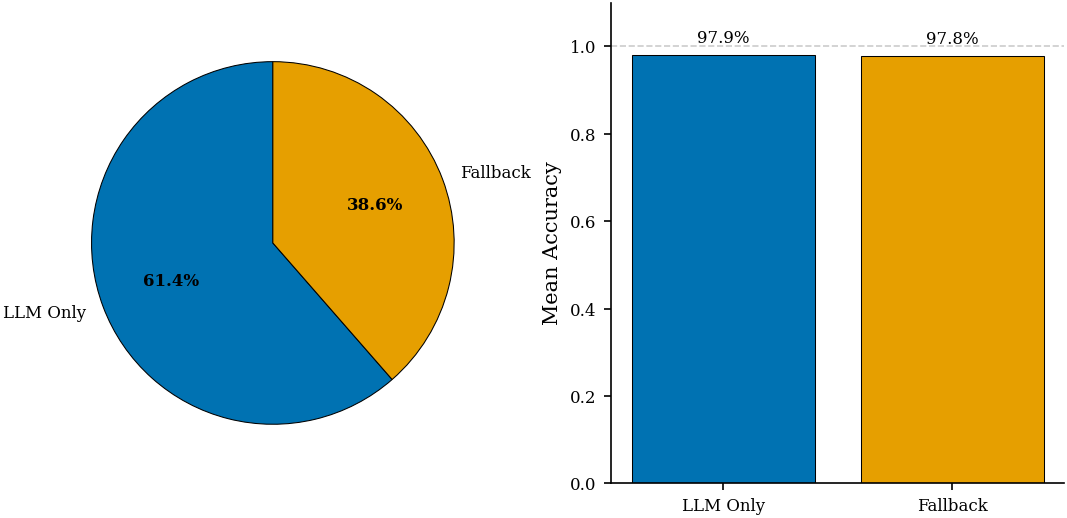

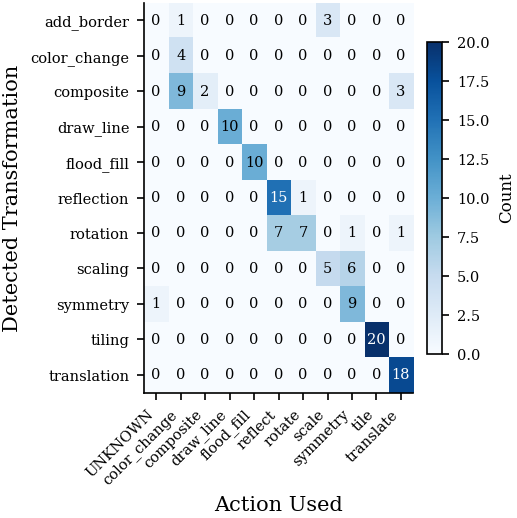

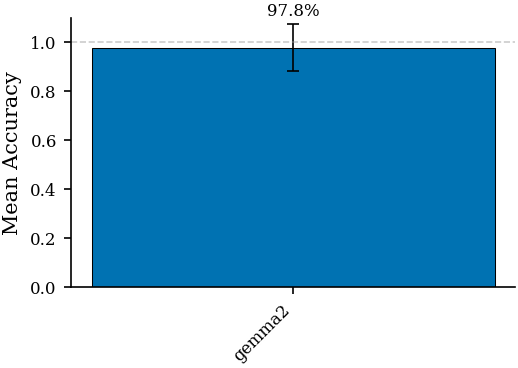

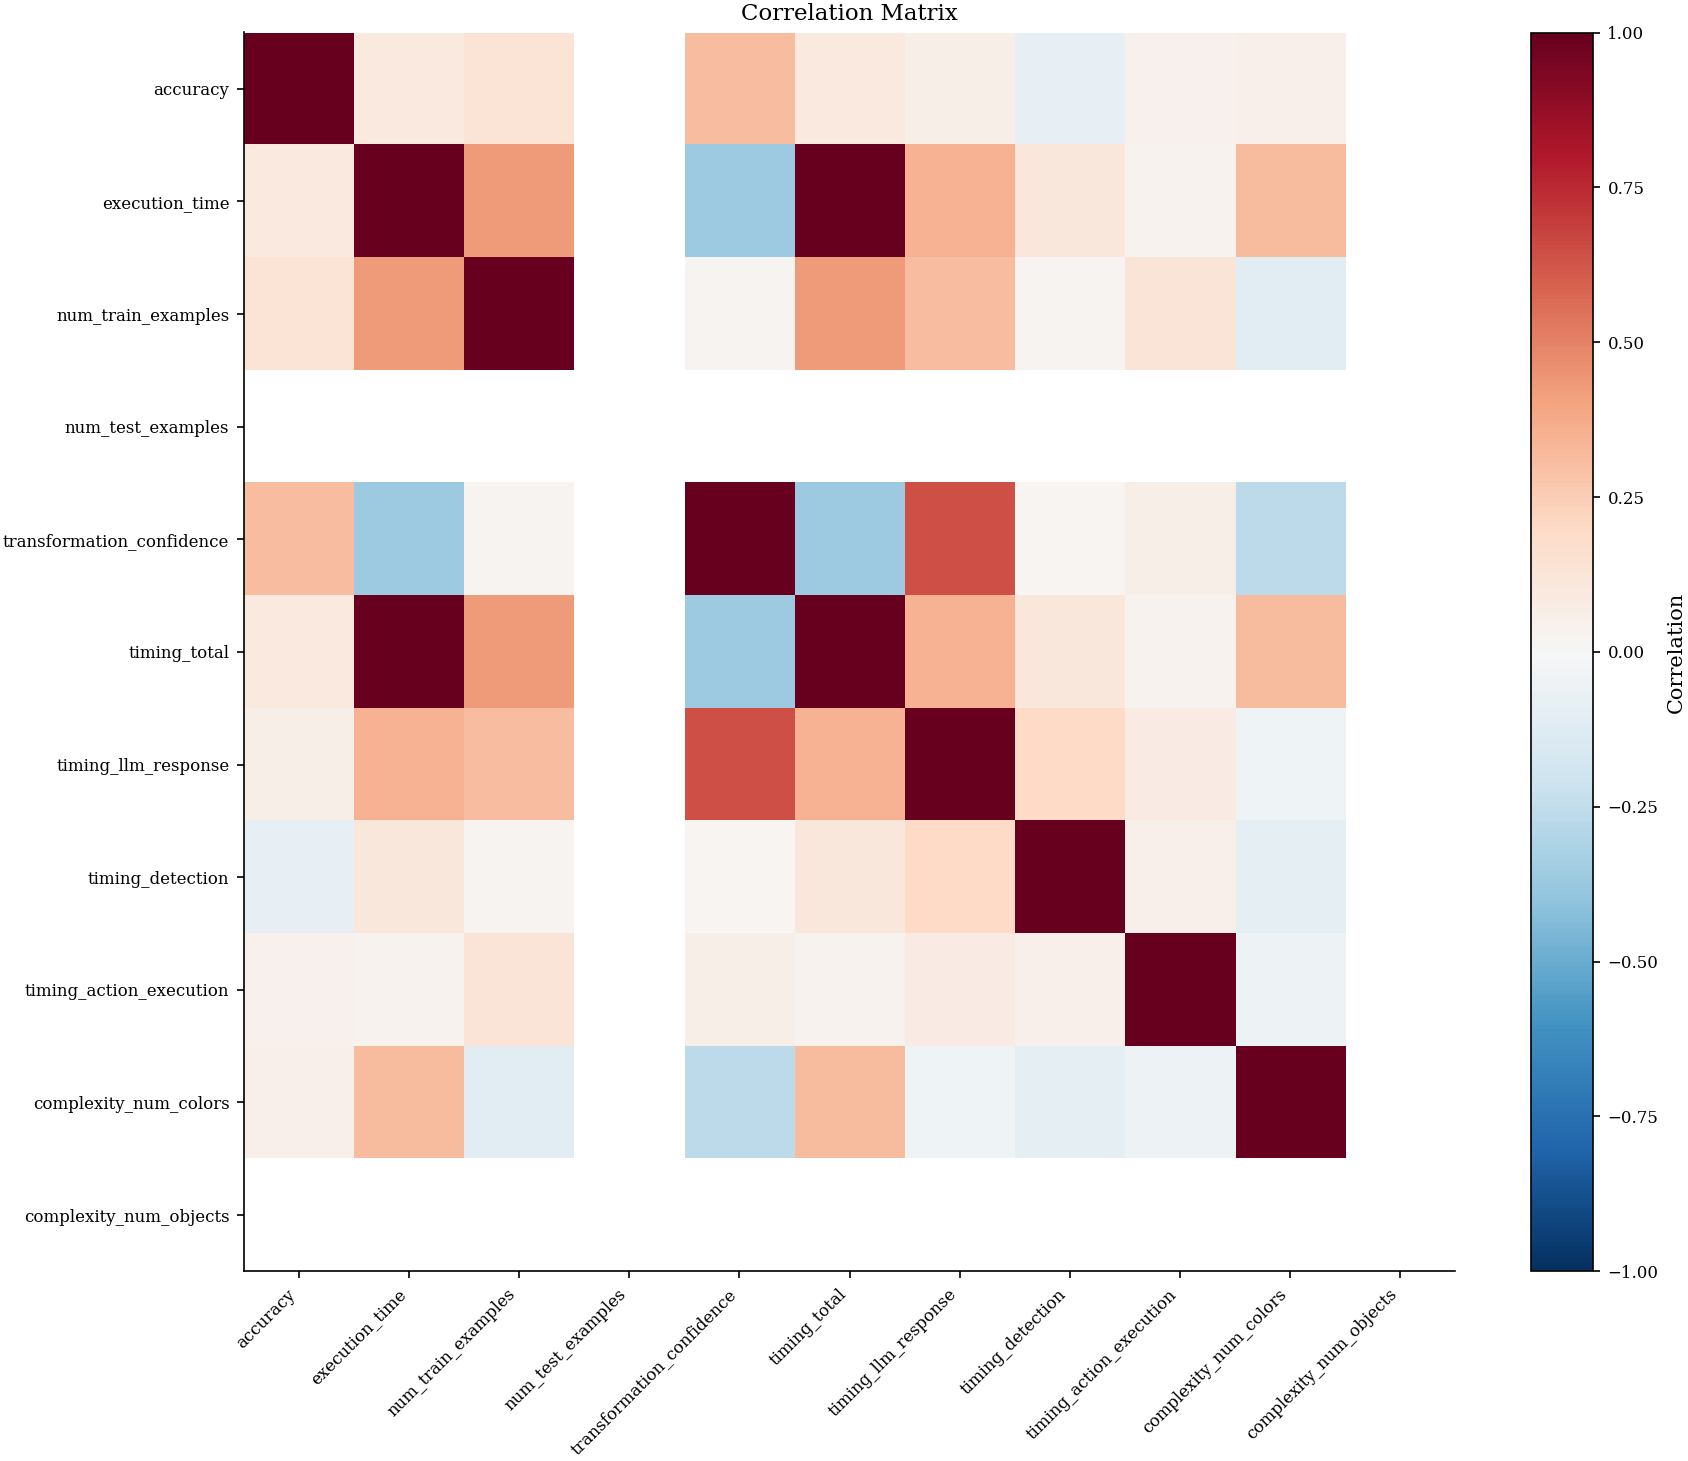

In [32]:
# Corrélations entre variables
corr = calc.correlation_analysis()

# Heatmap des corrélations
fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(corr, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)

ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.index)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right', fontsize=8)
ax.set_yticklabels(corr.index, fontsize=8)

plt.colorbar(im, ax=ax, label='Correlation')
ax.set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

In [33]:
# Analyse par complexité (nombre de couleurs)
if 'complexity_num_colors' in df.columns:
    acc_by_complexity = calc.accuracy_by_complexity('complexity_num_colors')
    print("Accuracy par nombre de couleurs:")
    display(acc_by_complexity)

Accuracy par nombre de couleurs:


,mean,std,count
complexity_num_colors,,,
1,0.9764,0.1001,124
2,0.9900,0.0200,10
3,1.0000,0.0000,4
4,1.0000,NaN,1
9,1.0000,NaN,1


In [34]:
# Tâches les plus difficiles (accuracy la plus basse)
print("Top 10 tâches les plus difficiles:")
difficult = df.nsmallest(10, 'accuracy')[['task_id', 'accuracy', 'primary_transformation', 'action_used']]
difficult

Top 10 tâches les plus difficiles:


,task_id,accuracy,primary_transformation,action_used
6,task_add_border_07,0.000000,None,UNKNOWN
85,task_reflection_06,0.666667,reflection,reflect
5,task_add_border_06,0.812500,rotation,reflect
4,task_add_border_05,0.840000,rotation,reflect
7,task_add_border_08,0.840000,rotation,reflect
9,task_add_border_10,0.840000,rotation,reflect
8,task_add_border_09,0.875000,rotation,reflect
24,task_color_change_05,0.875000,composite,color_change
17,task_blob_08,0.880000,reflection,reflect
28,task_color_change_09,0.920000,composite,color_change


In [35]:
# Tâches échouées (erreurs)
failed = df[df['success'] == False]
if len(failed) > 0:
    print(f"Tâches échouées: {len(failed)}")
    display(failed[['task_id', 'error_message']].head(10))
else:
    print("Aucune tâche échouée!")

Aucune tâche échouée!


---

## Résumé

Ce notebook a montré comment:

1. **Charger** les données de batch avec `DataLoader`
2. **Explorer** les données avec pandas
3. **Calculer** des métriques statistiques avec `MetricsCalculator`
4. **Visualiser** les résultats avec `AnalysisVisualizer`
5. **Exporter** pour publication avec `ReportGenerator`

### Fichiers générés

- `analysis/latex/*.tex` - Tableaux LaTeX
- `analysis/figures/*.png` - Figures PNG
- `analysis/figures/*.pdf` - Figures PDF (pour LaTeX)
- `analysis/report.md` - Rapport Markdown
- `analysis/summary.csv` - Résumé CSV
- `analysis/full_data.csv` - Données complètes